In [1]:
import numpy as np
import csv
import os
import sklearn
import pandas
from pandas import read_csv as read
from sklearn import svm, preprocessing, ensemble
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.spatial import distance
import heapq
import matplotlib.pyplot as plt

In [2]:
path_train = "lab2data/arcene_train.data"
data_train = read(path_train, delimiter=" ")
data_train.columns = [i for i in range(1, 10001)] + ['class']
data_train = data_train.drop(['class'], axis=1)
data_train.head()

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0,41,82,165,60,554,379,0,71,0,...,213,605,69,7,473,0,57,0,284,423
1,0,0,1,40,0,451,402,0,0,0,...,235,593,28,0,24,0,90,0,34,508
2,0,56,44,275,14,511,470,0,0,0,...,91,600,0,26,86,0,102,0,0,469
3,105,0,141,348,0,268,329,0,0,1,...,813,0,0,0,0,190,301,0,0,354
4,38,62,0,251,75,515,0,9,85,300,...,272,454,0,36,2,369,194,18,59,340


In [3]:
path_test = "lab2data/arcene_valid.data"
data_test = read(path_test, delimiter=" ")
data_test.columns = [i for i in range(1, 10001)] + ['class']
data_test = data_test.drop(['class'], axis=1)
data_test.head()

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0,7,0,7,0,251,0,0,22,222,...,698,673,0,0,18,201,317,0,34,199
1,0,32,0,470,53,493,0,0,140,147,...,267,461,20,34,165,225,53,0,47,219
2,0,77,0,202,0,432,472,0,60,0,...,181,555,13,0,488,0,71,0,177,487
3,0,34,102,522,2,474,473,0,39,0,...,114,630,0,29,192,0,74,0,5,416
4,89,31,156,334,0,250,227,0,0,0,...,823,0,0,0,0,212,345,0,390,356


In [4]:
path_train_l = "lab2data/arcene_train.labels"
data_train_l = read(path_train_l, delimiter=" ")
path_test_l = "lab2data/arcene_valid.labels"
data_test_l = read(path_test_l, delimiter=" ")

In [5]:
X_train, X_test, y_train, y_test = data_train, data_test, np.ravel(data_train_l), np.ravel(data_test_l)

# Base result

In [6]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)
base_score = rf.score(X_test, y_test)
print(base_score)

0.7373737373737373


# Filter1 feature importance

In [7]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices[:20]):
    print("{:2d}. feature '{:5d}' ({:.4f})".format(f + 1, X_train.columns[idx], importances[idx]))

Feature importances:
 1. feature ' 7542' (0.0118)
 2. feature ' 6307' (0.0067)
 3. feature ' 1184' (0.0067)
 4. feature ' 5473' (0.0064)
 5. feature ' 4554' (0.0058)
 6. feature '  414' (0.0054)
 7. feature ' 6774' (0.0054)
 8. feature ' 1411' (0.0053)
 9. feature ' 5005' (0.0051)
10. feature ' 9970' (0.0046)
11. feature ' 6928' (0.0043)
12. feature ' 6481' (0.0042)
13. feature ' 9408' (0.0040)
14. feature ' 7593' (0.0040)
15. feature ' 4960' (0.0040)
16. feature '  294' (0.0040)
17. feature ' 7101' (0.0040)
18. feature ' 2401' (0.0040)
19. feature ' 8540' (0.0039)
20. feature '  436' (0.0039)


In [8]:
best_features = indices[:135]
best_features_names = X_train.columns[best_features]
best_f = [int(i) for i in best_features_names]
print(best_f)

[7542, 6307, 1184, 5473, 4554, 414, 6774, 1411, 5005, 9970, 6928, 6481, 9408, 7593, 4960, 294, 7101, 2401, 8540, 436, 7472, 5057, 2702, 8426, 2435, 872, 7731, 6800, 8254, 4840, 5801, 6496, 7232, 7178, 4662, 8095, 4121, 2714, 1376, 6712, 8744, 1975, 6905, 698, 7994, 782, 3370, 2752, 8802, 9655, 7183, 1661, 6616, 4974, 5752, 5140, 5995, 1476, 638, 9124, 4290, 8830, 830, 840, 6584, 5083, 1400, 7659, 893, 945, 720, 9128, 3014, 9851, 5523, 4070, 2517, 288, 5634, 7574, 8849, 1919, 4678, 8936, 1292, 7425, 7234, 3921, 8612, 4188, 5875, 8806, 6973, 7900, 4198, 2061, 8149, 2356, 3157, 9255, 8687, 9072, 4335, 5646, 7147, 8977, 471, 2288, 9270, 8058, 6126, 4241, 7271, 2762, 6939, 9536, 6243, 6428, 4243, 8406, 7447, 1705, 5, 3913, 6336, 1909, 9485, 787, 327, 9093, 1372, 5558, 3192, 2022, 7977]


In [10]:
print(X_train[best_f])

    7542  6307  1184  5473  4554  414   6774  1411  5005  9970  ...   1909  \
0     65   345     0    35   108    83    40   310   236    35  ...      0   
1      0   105    25     0   164    21     0   337   292     0  ...     32   
2     40   223    46    29   130    55     3   348   376     0  ...    200   
3    105    21    28   103   112    49    43   399   299     0  ...     81   
4     68   205    67    54     0   352    69     0   128     4  ...     10   
5     26     0     0     5   201    58     2   344   397     0  ...      0   
6     63    50    20    33   170    75    28   240   344     0  ...    104   
7      0   144    52     0    54    13     0   386   354     0  ...      0   
8     67   222    27    72    25    91    40    96   245     8  ...     12   
9      0    51   132     0   144    14     0   323   234     8  ...    103   
10    34   120     0    32     0   148    29     0   130     0  ...     15   
11    42   303    25     7   125    56    20   316   312     0  

In [11]:
rf2 = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf2.fit(X_train[best_f], y_train)
future_importance_score = rf2.score(X_test[best_f], y_test)
print(future_importance_score)

0.7474747474747475


# Filter2 euclidean distance

In [12]:
# normalize the data attributes
normalized_X = preprocessing.normalize(X_train)

rf4 = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)

dst_array = []

for i in range(0, 10000):
    dst_array.append(distance.euclidean(normalized_X[:,i], y_train))
dst_array = np.asarray(dst_array)
ind = heapq.nsmallest(20, range(len(dst_array)), dst_array.take)

rf4.fit(X_train[ind], y_train)
euclidean_score = rf4.score(X_test[ind], y_test)
print(euclidean_score)

0.8080808080808081


# Filter 3 coefficient correlation

In [13]:
rf5 = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
normalized_X = preprocessing.normalize(X_train)
np.seterr(divide='ignore', invalid='ignore')
corr_array = []

for i in range(0, 10000):
    corr_array.append(np.corrcoef(normalized_X[:,i], y_train)[0, 1])
corr_array = np.asarray(corr_array)
ind2 = heapq.nlargest(45, range(len(corr_array)), corr_array.take)

rf4.fit(X_train[ind2], y_train)
coef_corr_score = rf4.score(X_test[ind2], y_test)
print(coef_corr_score)

0.8282828282828283


# Wrapper

In [14]:
import random
rf3 = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
c = list(range(1, 10001))
c = random.sample(c, 10000)
g = random.sample(c, 10)
rf_fit = rf3.fit(X_train[g], y_train)
wrapper_score = rf_fit.score(X_test[g], y_test)
for i in range(1, 10001):          #Forward Selection wrapper
    if c[i] in g:
        continue
    g.append(c[i])
    fit = rf_fit.fit(X_train[g], y_train)
    score = rf_fit.score(X_test[g], y_test)
    if score < wrapper_score:
        break
    wrapper_score = score
print(wrapper_score)

0.7676767676767676


# Plot

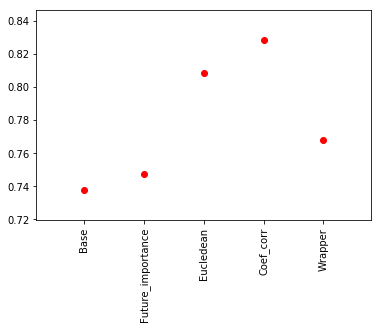

In [15]:
x = [1, 2, 3, 4, 5]
y = [base_score, future_importance_score, euclidean_score, coef_corr_score, wrapper_score]
labels = ['Base', 'Future_importance', 'Eucledean', 'Coef_corr', 'Wrapper']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()